In [86]:
##Importing libraries
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import nltk
nltk.download('stopwords')
from keras.preprocessing.text import text_to_word_sequence
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

from nltk.corpus import stopwords
from wordcloud import WordCloud

path = os.getcwd()+'/RateMyProfessor_Sample data.csv'
print(path)

/content/RateMyProfessor_Sample data.csv


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [87]:
##Reading csv files
df = pd.read_csv(path, low_memory=False)

df.head()

df.shape




(11492, 51)

In [88]:
df.describe()

,year_since_first_review,star_rating,diff_index,num_student,student_star,student_difficult,help_useful,help_not_useful,word_comment,asian,...,lots_of_homework,accessible_outside_class,lecture_heavy,extra_credit,graded_by_few_things,group_projects,test_heavy,so_many_papers,beware_of_pop_quizzes,IsCourseOnline
count,11492.000000,11492.000000,11492.000000,11492.000000,11487.000000,11487.000000,11492.000000,11492.000000,11484.000000,11491.000000,...,11491.000000,11491.000000,11491.000000,11491.000000,11491.000000,11491.000000,11491.000000,11491.000000,11491.000000,11491.000000
mean,8.028455,3.635929,2.954603,33.988166,3.615914,2.984417,0.291594,0.194048,37.383838,0.023268,...,0.207032,0.139849,0.233139,0.132277,0.100687,0.079105,0.103037,0.082586,0.066922,0.020886
std,3.954705,0.835888,0.779711,34.189715,1.450558,1.309371,0.869016,0.753102,21.224153,0.026928,...,0.405196,0.346845,0.422848,0.338807,0.300928,0.269915,0.304021,0.275268,0.249898,0.143009
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.001588,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,3.000000,2.400000,15.000000,2.500000,2.000000,0.000000,0.000000,19.000000,0.008272,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,8.000000,3.700000,3.000000,24.000000,4.000000,3.000000,0.000000,0.000000,39.000000,0.016319,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,11.000000,4.300000,3.500000,39.000000,5.000000,4.000000,0.000000,0.000000,57.000000,0.033403,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,16.000000,5.000000,5.000000,321.000000,5.000000,5.000000,9.000000,9.000000,142.000000,0.388363,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


For star_rating we can infer that on averge professors have a rating of 3.64 and sd of 0.8

In [89]:
print(df.shape)

print(df.info())

df.dtypes

(11492, 51)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11492 entries, 0 to 11491
Data columns (total 51 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   professor_name            11492 non-null  object 
 1   school_name               11492 non-null  object 
 2   department_name           11492 non-null  object 
 3   local_name                11492 non-null  object 
 4   state_name                11492 non-null  object 
 5   year_since_first_review   11492 non-null  float64
 6   star_rating               11492 non-null  float64
 7   take_again                1763 non-null   object 
 8   diff_index                11492 non-null  float64
 9   tag_professor             6767 non-null   object 
 10  num_student               11492 non-null  float64
 11  post_date                 11487 non-null  object 
 12  name_onlines              11492 non-null  object 
 13  name_not_onlines          11489 non-null  object 

professor_name               object
school_name                  object
department_name              object
local_name                   object
state_name                   object
year_since_first_review     float64
star_rating                 float64
take_again                   object
diff_index                  float64
tag_professor                object
num_student                 float64
post_date                    object
name_onlines                 object
name_not_onlines             object
student_star                float64
student_difficult           float64
attence                      object
for_credits                  object
would_take_agains            object
grades                       object
help_useful                 float64
help_not_useful             float64
comments                     object
word_comment                float64
gender                       object
race                         object
asian                       float64
hispanic                    

In [90]:
df.duplicated().sum()

9

(array([0.00326314, 0.        , 0.01522798, 0.02610512, 0.        ,
        0.02610512, 0.05438566, 0.08810477, 0.07070136, 0.        ,
        0.05547337, 0.08157849, 0.07722764, 0.07613992, 0.        ,
        0.13378872, 0.31761225, 0.16968326, 0.27736686, 0.        ,
        0.2719283 , 0.25234946, 0.34045423, 0.36329621, 0.        ,
        0.57104943, 0.26431431, 0.43834842, 0.46227811, 0.        ,
        0.28280543, 0.71353985, 0.3872259 , 0.66676819, 0.51340063,
        0.        , 0.49273408, 0.50796206, 0.5525583 , 0.        ,
        0.41985729, 0.40898016, 0.63631222, 0.68961016, 0.        ,
        0.24256004, 0.53297946, 0.61782109, 0.28063   , 0.11747302]),
 array([1.  , 1.08, 1.16, 1.24, 1.32, 1.4 , 1.48, 1.56, 1.64, 1.72, 1.8 ,
        1.88, 1.96, 2.04, 2.12, 2.2 , 2.28, 2.36, 2.44, 2.52, 2.6 , 2.68,
        2.76, 2.84, 2.92, 3.  , 3.08, 3.16, 3.24, 3.32, 3.4 , 3.48, 3.56,
        3.64, 3.72, 3.8 , 3.88, 3.96, 4.04, 4.12, 4.2 , 4.28, 4.36, 4.44,
        4.52, 4.6 , 4.

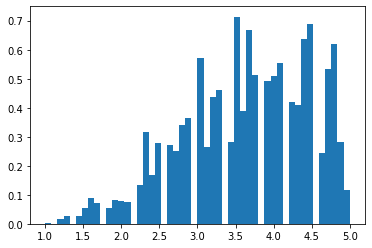

In [91]:
plt.hist(df['star_rating'],50,density=True)



In [92]:
##Checking for missing values
df.isnull().sum()

professor_name                 0
school_name                    0
department_name                0
local_name                     0
state_name                     0
year_since_first_review        0
star_rating                    0
take_again                  9729
diff_index                     0
tag_professor               4725
num_student                    0
post_date                      5
name_onlines                   0
name_not_onlines               3
student_star                   5
student_difficult              5
attence                     9138
for_credits                 9105
would_take_agains           9987
grades                      9560
help_useful                    0
help_not_useful                0
comments                       7
word_comment                   8
gender                         1
race                           1
asian                          1
hispanic                       1
nh_black                       1
nh_white                       1
gives_good

In [93]:
df.drop('take_again', axis=1, inplace=True)
df.drop('attence', axis=1, inplace=True)
df.drop('for_credits', axis=1, inplace=True)
df.drop('would_take_agains',axis=1, inplace=True)
df.drop('grades',axis=1, inplace=True)

In [94]:
df.isnull().sum()


professor_name                 0
school_name                    0
department_name                0
local_name                     0
state_name                     0
year_since_first_review        0
star_rating                    0
diff_index                     0
tag_professor               4725
num_student                    0
post_date                      5
name_onlines                   0
name_not_onlines               3
student_star                   5
student_difficult              5
help_useful                    0
help_not_useful                0
comments                       7
word_comment                   8
gender                         1
race                           1
asian                          1
hispanic                       1
nh_black                       1
nh_white                       1
gives_good_feedback            1
caring                         1
respected                      1
participation_matters          1
clear_grading_criteria         1
skip_class

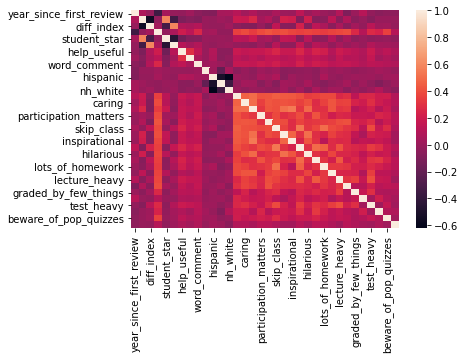

In [95]:
##Heatmap to find correlation between variables

sns.heatmap(df.corr())

## Student Star rating and years of experience, diff_index exhibit a strong correlation 

In [ ]:
df.columns

Index(['professor_name', 'school_name', 'department_name', 'local_name',
       'state_name', 'year_since_first_review', 'star_rating', 'diff_index',
       'tag_professor', 'num_student', 'post_date', 'name_onlines',
       'name_not_onlines', 'student_star', 'student_difficult', 'help_useful',
       'help_not_useful', 'comments', 'word_comment', 'gender', 'race',
       'asian', 'hispanic', 'nh_black', 'nh_white', 'gives_good_feedback',
       'caring', 'respected', 'participation_matters',
       'clear_grading_criteria', 'skip_class', 'amazing_lectures',
       'inspirational', 'tough_grader', 'hilarious', 'get_ready_to_read',
       'lots_of_homework', 'accessible_outside_class', 'lecture_heavy',
       'extra_credit', 'graded_by_few_things', 'group_projects', 'test_heavy',
       'so_many_papers', 'beware_of_pop_quizzes', 'IsCourseOnline'],
      dtype='object')

In [96]:
df['tag_professor'] = df['tag_professor'].fillna('')

In [ ]:
##importing library for Vader

nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [97]:
##Vader Sentiment analysis
sid = SentimentIntensityAnalyzer()


In [98]:
for i,row in df.iterrows():
    temp =  sid.polarity_scores(str(row['comments']))
    df.loc[i,'neg'] = temp['neg']
    df.loc[i,'neu'] = temp['neu']
    df.loc[i,'pos'] = temp['pos']
    df.loc[i,'compound'] = temp['compound']


In [99]:
df.head()

,professor_name,school_name,department_name,local_name,state_name,year_since_first_review,star_rating,diff_index,tag_professor,num_student,...,graded_by_few_things,group_projects,test_heavy,so_many_papers,beware_of_pop_quizzes,IsCourseOnline,neg,neu,pos,compound
0,Leslie Looney,University Of Illinois at Urbana-Champaign,Astronomy department,Champaign\xe2\x80\x93Urbana,IL,11.0,4.7,2.0,Hilarious (2) GROUP PROJECTS (2) Gives good ...,26.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.022,0.685,0.293,0.9488
1,Leslie Looney,University Of Illinois at Urbana-Champaign,Astronomy department,Champaign\xe2\x80\x93Urbana,IL,11.0,4.7,2.0,Hilarious (2) GROUP PROJECTS (2) Gives good ...,26.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.000,0.660,0.340,0.9476
2,Leslie Looney,University Of Illinois at Urbana-Champaign,Astronomy department,Champaign\xe2\x80\x93Urbana,IL,11.0,4.7,2.0,Hilarious (2) GROUP PROJECTS (2) Gives good ...,26.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.053,0.531,0.415,0.9325
3,Leslie Looney,University Of Illinois at Urbana-Champaign,Astronomy department,Champaign\xe2\x80\x93Urbana,IL,11.0,4.7,2.0,Hilarious (2) GROUP PROJECTS (2) Gives good ...,26.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.035,0.684,0.281,0.9655
4,Leslie Looney,University Of Illinois at Urbana-Champaign,Astronomy department,Champaign\xe2\x80\x93Urbana,IL,11.0,4.7,2.0,Hilarious (2) GROUP PROJECTS (2) Gives good ...,26.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.026,0.549,0.426,0.9870


In [100]:
##compound value >0 is categorised as positve else negative

df['sentiment'] = df['compound'].apply(lambda score: 1 if score>=0 else 0)

In [101]:
##Data set contians imbalanced data
df['sentiment'].value_counts()

1    8508
0    2984
Name: sentiment, dtype: int64

In [102]:
stop_words = set(stopwords.words('english'))

In [103]:
##Cleaning the text 
def preProcessing(text):
    text=str(text)
    #word tokenization
    tokenized_train_data = text_to_word_sequence(text,filters='!"#$%&()*+,./:;<=>?@[\\]^_`{|}~\t\n',split=" ")
    #stop word removal 
    stopwordremove = [i for i in tokenized_train_data if not i in stop_words]

    #joining to sentence
    stopwordremove_text = ' '.join(stopwordremove)

    #remove numbers
    numberRemove = ''.join(num for num in stopwordremove_text if not num.isdigit())
    lemmatizer = WordNetLemmatizer()
    lem_input = nltk.word_tokenize(numberRemove)

    ##Lemmatize data
    lem_text = ' '.join([lemmatizer.lemmatize(word) for word in lem_input])
    return lem_text


In [104]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

for i,row in df.iterrows():
  df.loc[i,'cleaned_comments'] = preProcessing(row['comments'])
  

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [105]:
pos = df[df['sentiment']==1]

neg = df[df['sentiment']==0]

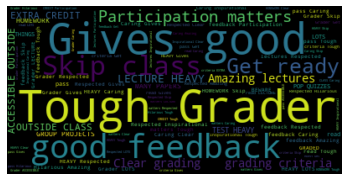

In [106]:
##Wordcloud for positive words
stopwords = set(stopwords.words('english'))

positive = " ".join(review for review in pos.tag_professor)
wordcloud = WordCloud(stopwords=stopwords).generate(positive)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

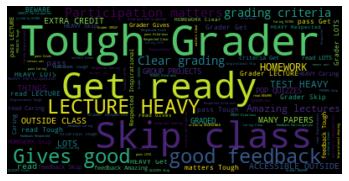

In [107]:
##Wordcloud for negative words

negative = " ".join(review for review in neg.tag_professor)
wordcloud = WordCloud(stopwords=stopwords).generate(negative)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [108]:
##Adding textblob sentiment

df['textblob_sentiment'] = df['comments'].apply(lambda comments: TextBlob(str(comments)).sentiment.polarity)

In [109]:
df['txtblb_sentiment'] = df['textblob_sentiment'].apply(lambda score: 1 if score>=0 else 0)

In [110]:
##comparing textblob and vader
sum(df['txtblb_sentiment']!=df['sentiment'])

2060

In [111]:
# amazon_rev = pd.read_csv('/content/amazon_cells_labelled.txt', header =None)
##Reading in amazon labelled reviews
with open('/content/amazon_cells_labelled.txt') as f:
    amazon_reviews = f.readlines()

  

In [112]:
##Formatting data

amazon_rev = pd.DataFrame(columns=['review','sentiment'])
for i,r in enumerate(amazon_reviews):
  temp = r.split('\t')
  amazon_rev.loc[i] = [temp[0], temp[1].strip()]



In [113]:
amazon_rev.head()

,review,sentiment
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [114]:
##Preprocessing data for amazon reviews
for i, row in amazon_rev.iterrows():
    amazon_rev.loc[i,'cleaned_comments'] = preProcessing(row['review'])

In [115]:
###Reading imdb labelled reviews .

review = pd.read_csv('/content/IMDB Dataset.csv')


review.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [116]:
##Converting strings to numeric form
review['sentiment'] = review['sentiment'].map({'positive': 1, 'negative': 0})


for i, row in review.iterrows():
    review.loc[i,'cleaned_comments'] = preProcessing(row['review'])

In [117]:
##Combining data 
data = review.append(amazon_rev)
print(review.size, amazon_rev.size)


#data.size

data['sentiment']=data['sentiment'].astype('int')

150000 3000


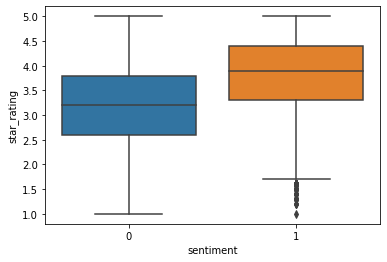

In [118]:
#Higher star rating is associated with positive sentiment

sns.boxplot(data=df, y='star_rating', x='sentiment')

In [119]:
##Dropping outliers

outlier_index = df[(df['sentiment']==1)& (df['star_rating']<1.7) ].index
df.drop(outlier_index , inplace=True)


df.size

616626

In [120]:
data.head()

,review,sentiment,cleaned_comments
0,One of the other reviewers has mentioned that ...,1,one reviewer mentioned watching oz episode hoo...
1,A wonderful little production. <br /><br />The...,1,wonderful little production br br filming tech...
2,I thought this was a wonderful way to spend ti...,1,thought wonderful way spend time hot summer we...
3,Basically there's a family where a little boy ...,0,basically there 's family little boy jake thin...
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,petter mattei 's love time money visually stun...


In [121]:
df = df.dropna()

In [ ]:
##Splitting data to test and train and vectorizing andscaling data.
def split_prep_data():

  # Training model on IMDB reviews
  X = data['cleaned_comments']
  y = data['sentiment']
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

  # count vectorizer:
  vectorizer = CountVectorizer(token_pattern=r'\b\w+\b')
  #vectorizer = TfidfVectorizer()

  train_matrix = vectorizer.fit_transform(X_train)
  test_matrix = vectorizer.transform(X_test)

  X_train = train_matrix
  X_test = test_matrix

  ##Scaling
  scaler = StandardScaler(with_mean=False)
  X_train = scaler.fit_transform(X_train)
  X_test = scaler.transform(X_test)

  return vectorizer ,scaler, X_train, y_train, X_test, y_test

In [ ]:
def testing_RMF(vectorizer,scaler, df):
  ###Using the trained model to predict labels of Rate My professor reviews
  df['cleaned_comments'].isna().sum()
  
  ###Testing on Professor reviews
  X_test = df['cleaned_comments']
  y_test = df['sentiment']

  test_matrix = vectorizer.transform(X_test)
  X_test = test_matrix
  X_test = scaler.transform(X_test)

  return X_test, y_test

In [ ]:
vectorizer ,scaler, X_train, y_train, X_test, y_test = split_prep_data()


In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='lbfgs', max_iter=6000, class_weight='balanced')

In [ ]:
## Training on IMDB reviews 
lr.fit(X_train,y_train)

LogisticRegression(max_iter=6000)

In [ ]:
## Testing IMDB review sentiment
predictions = lr.predict(X_test)
print(predictions)

[0 1 0 ... 1 0 0]


In [ ]:
##Accuracy of Logistic regression on IMDB reviews ( labelled data )
from sklearn.metrics import confusion_matrix,classification_report
import numpy as np

# new = np.asarray(y_test)
print(confusion_matrix(predictions,y_test))

print(classification_report(predictions,y_test))
#Accuracy 86%

##F1-score for Logistic model on IMDB reviews
from sklearn.metrics import confusion_matrix,classification_report, f1_score

print("F1_score:",f1_score(predictions,y_test))

[[4246  722]
 [ 853 4379]]
              precision    recall  f1-score   support

           0       0.83      0.85      0.84      4968
           1       0.86      0.84      0.85      5232

    accuracy                           0.85     10200
   macro avg       0.85      0.85      0.85     10200
weighted avg       0.85      0.85      0.85     10200

F1_score: 0.8475757282492984


In [ ]:
##Testing on RMF dataset using trained model
X_test, y_test = testing_RMF(vectorizer,scaler, df)

In [ ]:
predictions = lr.predict(X_test)

In [ ]:
##Comparing predictions with Vader
confusion_matrix(predictions,y_test)

print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

           0       0.60      0.45      0.51      6983
           1       0.74      0.84      0.78     12872

    accuracy                           0.70     19855
   macro avg       0.67      0.64      0.65     19855
weighted avg       0.69      0.70      0.69     19855



In [ ]:
##F1-score for Logistic model on RMF reviews
from sklearn.metrics import confusion_matrix,classification_report, f1_score

f1_score(predictions,y_test)

0.7830922439485353

In [122]:
##Training IMDB on Random forest
vectorizer ,scaler, X_train, y_train, X_test, y_test = split_prep_data()

In [123]:

##Training random forest on IMDB dataset
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators = 100, class_weight='balanced') 
 
# Training the model on the training dataset
clf.fit(X_train, y_train)
 
# predicti on the test dataset
y_pred = clf.predict(X_test)
 
# df['rnd_pred'] = y_pred
# metrics are used to find accuracy or error
from sklearn import metrics 
print()
 
# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))

print("F1_score:",f1_score(y_pred,y_test))


ACCURACY OF THE MODEL:  0.855686274509804
F1_score: 0.8561094819159336


In [124]:
X_test, y_test = testing_RMF(vectorizer,scaler, df)

In [125]:
##Testing the model on RMF reviews
 
# Training the model on the training dataset
clf.fit(X_train, y_train)
 
# predicti on the test dataset
y_pred = clf.predict(X_test)
 
# df['rnd_pred'] = y_pred
# metrics are used to find accuracy or error
from sklearn import metrics 
print()
 
# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))

print("F1_score:", f1_score(y_pred,y_test))


ACCURACY OF THE MODEL:  0.7751577840112202
F1_score: 0.8331490275157744


In [126]:
##Training IMDB on KNN
vectorizer ,scaler, X_train, y_train, X_test, y_test = split_prep_data()

In [131]:
##Training KNN on IMDB dataset
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=101) 
 
# Training the model on the training dataset
knn.fit(X_train, y_train)
 
# predicti on the test dataset
y_pred = knn.predict(X_test)
 
# df['rnd_pred'] = y_pred
# metrics are used to find accuracy or error
from sklearn import metrics 
print()
 
# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))

print("F1_score:",f1_score(y_pred,y_test))


ACCURACY OF THE MODEL:  0.5400980392156862
F1_score: 0.6802099665962233


In [132]:
# error_rate = []
# for i in range(1,40):
#  knn = KNeighborsClassifier(n_neighbors=i)
#  knn.fit(X_train,y_train)
#  pred_i = knn.predict(X_test)
#  error_rate.append(np.mean(pred_i != y_test))

# plt.figure(figsize=(10,6))
# plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
#          marker='o',markerfacecolor='red', markersize=10)
# plt.title('Error Rate vs. K Value')
# plt.xlabel('K')
# plt.ylabel('Error Rate')
# print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

In [133]:
X_test, y_test = testing_RMF(vectorizer,scaler, df)

##Testing the model on RMF reviews
 
# Training the model on the training dataset
knn.fit(X_train, y_train)
 
# predicti on the test dataset
y_pred = knn.predict(X_test)
 

# metrics are used to find accuracy or error
from sklearn import metrics 
print()
 
# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))

print("F1_score:", f1_score(y_pred,y_test))


ACCURACY OF THE MODEL:  0.7391304347826086
F1_score: 0.8497880072683223


In [134]:
##Setting star_rating measures
df = df[df['star_rating'] != 3]
df['star_sentiment'] = df['star_rating'].apply(lambda rating : 1 if rating > 3 else 0)


In [135]:
##comparing star ratinf with Vader sentiment
sum(df['star_sentiment']!=df['sentiment'])


2868

1. Vader on RMF, IMDB, Amazon reviews
2. Trained and tested Logistic Regression on IMDB and Amazon sentiments and obtained accuracy and F1_score. 
3. Used trained Logistic Regression model on RMF reviews as test and obtained predictions.
4. Trained and tested Random Forest on IMDB and Amazon sentiments and obtained accuracy and F1_score.
5. Used trained Random Forest model on RMF reviews as test and obtained predictions.
6. Trained and tested KNN on IMDB and Amazon sentiments and obtained accuracy and F1_score.
7. Used trained KNN model on RMF reviews as test and obtained predictions.
8. Trained and tested RNN on IMDB and Amazon sentiments and obtained accuracy and F1_score.
9. Used trained RNN model on RMF reviews as test and obtained predictions.


In [149]:
###RNN
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, Dropout
from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from keras.utils.np_utils import to_categorical
import re

from sklearn.model_selection import train_test_split

from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from keras import regularizers

max_words = 5000
max_len = 200

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(df.cleaned_comments)
sequences = tokenizer.texts_to_sequences(df.cleaned_comments)
reviews = pad_sequences(sequences, maxlen=max_len)
print(reviews)



X_train, X_test, y_train, y_test = train_test_split(reviews, df.sentiment.values, test_size=0.2, random_state=101)






[[   0    0    0 ...  805   40   89]
 [   0    0    0 ...  396  603   74]
 [   0    0    0 ... 1330  275   18]
 ...
 [   0    0    0 ...    3 2207    1]
 [   0    0    0 ...    0    0  467]
 [   0    0    0 ...    0    0   66]]


In [150]:
from sklearn.utils import class_weight

# class_weights = class_weight.compute_class_weight('balanced',
#                                                  np.unique(y_train),
#                                                  y_train)

class_weights = class_weight.compute_class_weight(
                                        class_weight = "balanced",
                                        classes = np.unique(y_train),
                                        y = y_train                                                    
                                    )
class_weights = dict(zip(np.unique(y_train), class_weights))
class_weights


{0: 1.9389755011135859, 1: 0.6737347159882371}

In [151]:
from keras.models import Sequential,load_model
from keras import layers
from keras import regularizers
from keras import backend as K
from keras.callbacks import Callback,ModelCheckpoint
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier

##Compute f1-score
def f1_score(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

##Compute precision
def precision(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

##Compute REcall
def recall(y_true, y_pred): 
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall



model = Sequential()
model.add(layers.Embedding(max_words, 128))
model.add(layers.LSTM(64,dropout=0.5))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy',f1_score,precision,recall])
checkpoint = ModelCheckpoint("rnn_model.hdf5", monitor='val_accuracy', verbose=1,save_best_only=True, mode='auto', period=1,save_weights_only=False)
output = model.fit(X_train, y_train, epochs=10,validation_data=(X_test, y_test),callbacks=[checkpoint],class_weight=class_weights)





Epoch 1/10
273/273 [==============================] - ETA: 0s - loss: 0.4967 - accuracy: 0.7619 - f1_score: 0.8245 - precision: 0.8839 - recall: 0.7882
Epoch 1: val_accuracy improved from -inf to 0.80202, saving model to rnn_model.hdf5
273/273 [==============================] - 55s 186ms/step - loss: 0.4967 - accuracy: 0.7619 - f1_score: 0.8245 - precision: 0.8839 - recall: 0.7882 - val_loss: 0.4244 - val_accuracy: 0.8020 - val_f1_score: 0.8544 - val_precision: 0.9608 - val_recall: 0.7727
Epoch 2/10
273/273 [==============================] - ETA: 0s - loss: 0.2732 - accuracy: 0.8800 - f1_score: 0.9110 - precision: 0.9513 - recall: 0.8777
Epoch 2: val_accuracy improved from 0.80202 to 0.85025, saving model to rnn_model.hdf5
273/273 [==============================] - 50s 183ms/step - loss: 0.2732 - accuracy: 0.8800 - f1_score: 0.9110 - precision: 0.9513 - recall: 0.8777 - val_loss: 0.3464 - val_accuracy: 0.8503 - val_f1_score: 0.8937 - val_precision: 0.9517 - val_recall: 0.8458
Epoch 3/1

In [152]:
loss, accuracy, f1_score,precision,recall = model.evaluate(X_test, y_test, verbose=0)
print('Loss: %f' % (loss))
print('Accuracy: %f' % (accuracy))
print('F1-score: %f' % (f1_score))
print('Precision: %f' % (precision))
print('Recall: %f' % (recall))

Loss: 0.558962
Accuracy: 0.863574
F1-score: 0.909169
Precision: 0.909706
Recall: 0.911845


In [153]:
##predicting sample sentence sentiments

sequence = tokenizer.texts_to_sequences(['He is HORRIBLE!!!!! Do not take him if you can. His tests are very hard and nothing is multiple choice and he has other students grade his work because he can\'t! He has even lost students work!'])
test = pad_sequences(sequence, maxlen=max_len)
pred = model.predict(test)
if pred > 0.5:
  print('Positive')
else:
  print('Negative')


1/1 [==============================] - 1s 614ms/step
Negative


In [154]:
##predicting sample sentence sentiments

sequence = tokenizer.texts_to_sequences(['Excellent professor. Hilarious, fun, and good.'])
test = pad_sequences(sequence, maxlen=max_len)
pred = model.predict(test)
if pred > 0.5:
  print('Positive')
else:
  print('Negative')
# print(pred)

1/1 [==============================] - 0s 34ms/step
Positive
